<a href="https://colab.research.google.com/github/brendanpshea/programming_problem_solving/blob/main/Java_03_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Algorithms
## *Because Even the Parks Department Needs a Plan*

**Brendan Shea, PhD**

---

### Learning Objectives

By the end of this lesson, you will be able to:

1. **Define** what an algorithm is and identify its key characteristics
2. **Create** flowcharts using Mermaid to visualize algorithm logic
3. **Implement** linear search to find elements in an array
4. **Apply** accumulator patterns (sum, count, min, max) to process collections of data
5. **Explain** basic algorithm analysis concepts (best, worst, and average cases)
6. **Use** the Java keywords `break`, `continue`, and `switch` appropriately

## Brendan's Lecture

https://youtu.be/WmqykQ8ir-E

## What is an Algorithm?

An **algorithm** is a precise, finite sequence of well-defined steps that solves a problem or accomplishes a task.

Think of it like Leslie Knope's legendary binder system. When Leslie needs to plan a community event, she doesn't just wing it—she follows a meticulous, step-by-step process documented across color-coded binders. Each step is clear, the process eventually ends (even if it takes 47 binders), and the result is a spectacularly over-planned harvest festival.

Algorithms are everywhere in daily life:

- A recipe for making waffles (input: ingredients → output: delicious breakfast)
- Directions from your house to the park (input: starting location → output: arrival at destination)
- The process of checking out a library book (input: book selection → output: borrowed book)

What separates an algorithm from vague instructions is **precision**. "Make it taste good" is not an algorithm. "Add 1/4 teaspoon of salt, stir for 30 seconds" is part of one.

> **Key Insight:** Every program you write is an implementation of one or more algorithms. Learning to think algorithmically is learning to think like a programmer.

## Characteristics of Algorithms

For a set of instructions to qualify as an algorithm, it must have these five characteristics:

| Characteristic | Definition | Parks Dept Example |
|----------------|------------|--------------------|
| **Input** | Zero or more values are provided to the algorithm | A citizen's complaint form (or no input for a scheduled task) |
| **Output** | At least one value is produced as a result | A resolved complaint, a permit, or a report |
| **Definiteness** | Each step is precisely defined with no ambiguity | "File form 27B-stroke-6" not "do the paperwork thing" |
| **Finiteness** | The algorithm must eventually terminate | The permit process MUST end (even in Pawnee bureaucracy) |
| **Effectiveness** | Each step is basic enough to be carried out | "Approve if budget < $500" not "approve if it feels right" |

### A Non-Algorithm Example

Consider Andy Dwyer's instructions for feeding a goldfish: "Give it some food whenever it looks hungry."

This fails as an algorithm because:
- **Not definite:** "some food" and "looks hungry" are ambiguous
- **Not effective:** How do you determine if a fish "looks hungry"?

A proper algorithm would be: "At 9:00 AM and 6:00 PM, drop exactly 3 pellets of fish food into the tank."


##  Review — Loops and Conditionals as Algorithms

You already know how to write loops—congratulations, you've been writing algorithms! A loop implements a repetitive algorithm: do something over and over until a condition is met.

Consider this scenario: Leslie Knope is at JJ's Diner, and she's ordered her usual stack of waffles. The server needs to count out loud as they place each waffle on her plate.

```java
int waffleOrder = 5;

for (int i = 1; i <= waffleOrder; i++) {
    System.out.println("Waffle #" + i + " served!");
}
System.out.println("Enjoy your waffles, ma'am!");
```

This simple `for` loop IS an algorithm. It has input (the waffle count), clear steps (print and increment), it terminates (when `i` exceeds the order), and it produces output (the printed messages).

### Review: Conditionals in Algorithms

Conditionals let algorithms make decisions. The Parks Department receives all kinds of citizen complaints, and they need to route each one to the right person.

```java
String complaint = "raccoon";

if (complaint.equals("pothole")) {
    System.out.println("Forwarding to Street Department");
} else if (complaint.equals("raccoon")) {
    System.out.println("Forwarding to Animal Control");
} else if (complaint.equals("park damage")) {
    System.out.println("Handling in Parks Department");
} else {
    System.out.println("Filing under 'Miscellaneous'");
}
```

This decision-making process is algorithmic: given an input (the complaint type), follow a defined set of rules to produce an output (the routing destination). There's no ambiguity—each complaint type maps to exactly one action.

### Combining Loops and Conditionals

Real algorithms often combine iteration and decision-making. Let's process an entire week's worth of complaints and count how many fall into each category.

```java
String[] complaints = {"raccoon", "pothole", "raccoon", "park damage",
                       "pothole", "noise", "raccoon"};
int raccoonCount = 0;
int potholeCount = 0;
int otherCount = 0;

for (int i = 0; i < complaints.length; i++) {
    if (complaints[i].equals("raccoon")) {
        raccoonCount++;
    } else if (complaints[i].equals("pothole")) {
        potholeCount++;
    } else {
        otherCount++;
    }
}
```

After this runs: `raccoonCount` is 3, `potholeCount` is 2, and `otherCount` is 2. This is actually an example of the **accumulator pattern**—we'll explore this in depth later in the lecture.

### The Problem with Code Alone

Code is precise, but it's not always easy to *see* what's happening at a glance. Reading a complex algorithm in code is a bit like reading Andy Dwyer's song lyrics—technically it's all there, but you might need a diagram to figure out the structure.

Consider these questions about the complaint-counting code above:

- What's the overall flow of the algorithm?
- Where are the decision points?
- How do the pieces connect?

You *can* answer these by reading carefully, but there's a better way: **flowcharts**. A flowchart gives us a visual map of an algorithm's logic, making it easier to:

- **Design** algorithms before writing code
- **Communicate** logic to others (including non-programmers)
- **Debug** by tracing the flow visually
- **Document** how a program works

Let's learn how to create flowcharts using a tool called **Mermaid**.


## Flowcharts with Mermaid

A **flowchart** is a visual representation of an algorithm using standardized symbols connected by arrows. It's like a map for your code—showing where you start, the paths you can take, and where you end up.

Here are the standard flowchart symbols:

| Symbol | Shape | Purpose | Example |
|--------|-------|---------|--------|
| **Terminal** | Oval / Rounded rectangle | Start or End of algorithm | "Start", "End" |
| **Process** | Rectangle | An action or operation | "Add 1 to counter" |
| **Decision** | Diamond | Yes/No or True/False branch | "Is count < 10?" |
| **Input/Output** | Parallelogram | Reading input or displaying output | "Print total" |
| **Arrow** | Line with arrowhead | Flow direction | → |

We'll use **Mermaid**, a text-based diagramming tool, to create our flowcharts. Instead of dragging and dropping shapes, you write simple code that Mermaid converts into a diagram.

### Mermaid Syntax Basics

Mermaid flowcharts start with `flowchart TD` (top-down) or `flowchart LR` (left-right). Then you define nodes and connect them with arrows.

**Node shapes:**
- `A[Text]` → Rectangle (process)
- `B{Text}` → Diamond (decision)
- `C([Text])` → Oval/stadium (terminal)
- `D[/Text/]` → Parallelogram (input/output)

**Connections:**
- `A --> B` → Arrow from A to B
- `A -->|label| B` → Arrow with a label
- `A --> B --> C` → Chain multiple connections

Let's see some example!

(Note: Run this cell first--it sets up the document to render mermaid).

In [ ]:
# @title
import base64
import requests
import json
from IPython.display import SVG, display

def mm(graph: str, width: str = "100%") -> None:
    """
    Fetch and display a Mermaid diagram with optional scaling.

    Parameters:
      graph (str): Mermaid graph definition.
      width (str): CSS width for the SVG (e.g., "100%", "800px").
                   Defaults to "75%" (full cell width).
    """
    # 1. Configuration to fix font clipping
    graph_data = {
        "code": graph,
        "mermaid": {
            "theme": "default",
            "themeVariables": {
                "fontFamily": "arial"
            }
        }
    }

    # 2. Encode
    json_str = json.dumps(graph_data)
    b64 = base64.urlsafe_b64encode(json_str.encode('utf-8')).decode('ascii')

    # 3. Fetch
    url = f'https://mermaid.ink/svg/{b64}'
    response = requests.get(url)

    if response.status_code == 200:
        display(SVG(data=response.text), metadata={"width": width})
    else:
        print(f"Error: {response.status_code}")

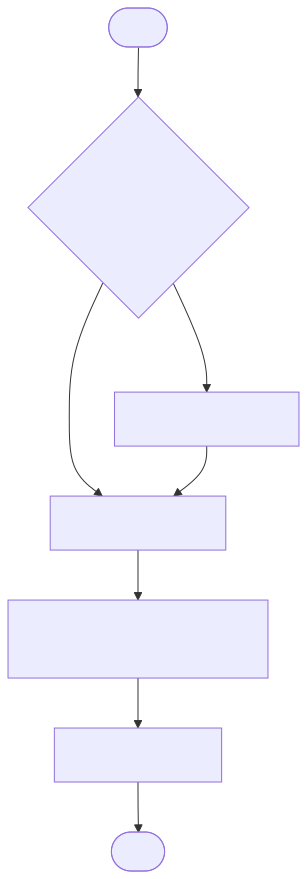

In [ ]:
mm("""
flowchart TD
    A([Start]) --> B{Any coworkers nearby?}
    B -->|Yes| C[Hide behind plant]
    B -->|No| D[Proceed to desk]
    C --> D
    D --> E[Eat bacon from desk drawer]
    E --> F[Work on canoe]
    F --> G([End])"""
)

**Ron's Morning Routine** above shows a simple flowchart with one decision point. Notice how:
- The oval nodes mark Start and End
- The diamond creates a Yes/No branch
- Both branches eventually converge back to the same path
- The flow moves top-to-bottom (TD)

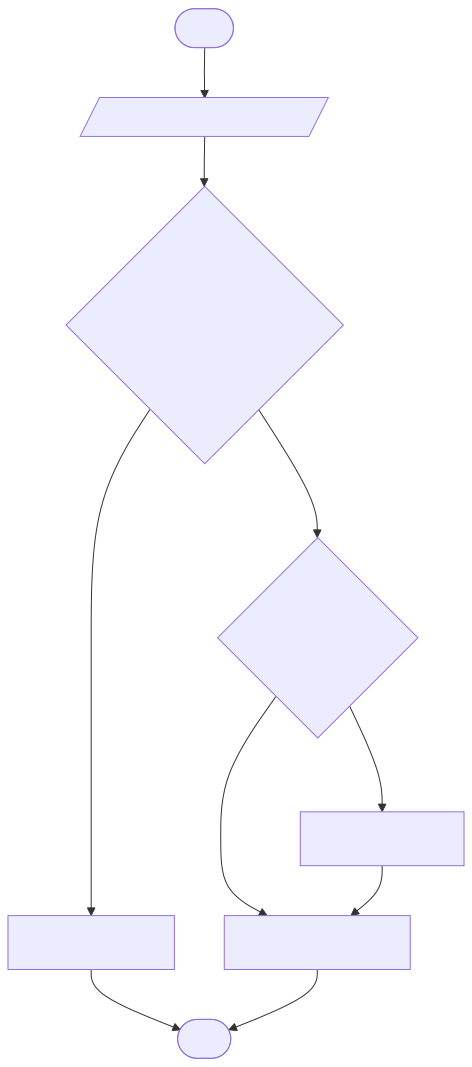

In [ ]:
mm("""
flowchart TD
    A([Start]) --> B[/Read: new project proposal/]
    B --> C{Does it help Pawnee citizens?}
    C -->|Yes| D{Do we have budget?}
    C -->|No| E[Politely decline]
    D -->|Yes| F[Add to binder #47]
    D -->|No| G[Apply for grant]
    G --> F
    E --> H([End])
    F --> H""")

**Should Leslie Take On a New Project?** demonstrates nested decisions—one diamond leading to another. This is common when algorithms have multiple conditions to check.

Notice the parallelogram (`[/Text/]`) for the input operation, and how multiple paths eventually converge at the End node.

### Flowcharts for Loops

Loops are represented in flowcharts by arrows that point *backward* to an earlier step, creating a cycle. The key components are:

1. **Initialization** — Set up any variables before the loop
2. **Condition check** — A decision diamond that determines whether to continue
3. **Loop body** — The work done each iteration
4. **Update** — Change something so the loop eventually ends
5. **Back-arrow** — Return to the condition check

The loop exits when the condition becomes false, at which point the flow continues forward instead of looping back.

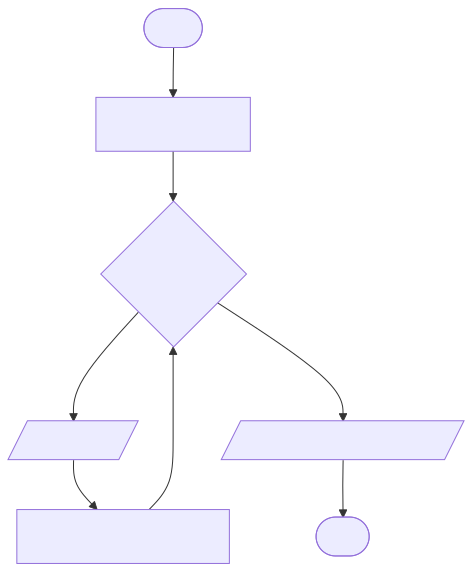

In [ ]:
mm("""
flowchart TD
    A([Start]) --> B[Set count = 5]
    B --> C{Is count > 0?}
    C -->|Yes| D[/Print count/]
    D --> E[Subtract 1 from count]
    E --> C
    C -->|No| F[/Print 'Parks event starting!'/]
    F --> G([End])
  """)

**Countdown for Parks Event** shows the loop pattern clearly. Follow the arrows:
- Start at count = 5
- Check: Is 5 > 0? Yes → Print 5, subtract 1 (now count = 4)
- Loop back: Is 4 > 0? Yes → Print 4, subtract 1 (now count = 3)
- ... continue until count = 0
- Check: Is 0 > 0? No → Exit loop, print announcement

The back-arrow from "Subtract 1" to the decision diamond is what makes this a loop!

### 🏋️ Exercise 1: Complete the Flowchart

The Parks Department needs a flowchart for checking if a park is open. The algorithm should:
1. Read the current hour (0-23)
2. Check if the hour is between 6 and 22 (parks open 6 AM to 10 PM)
3. Print either "Park is OPEN" or "Park is CLOSED"

**Complete the Mermaid code below by filling in the TODOs:**

**Hint:** The condition checks if `currentHour >= 6 AND currentHour <= 22`


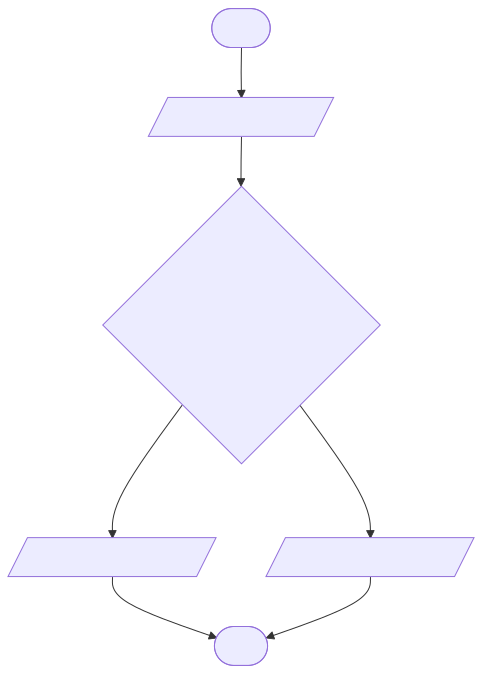

In [ ]:
mm("""
flowchart TD
    A([Start]) --> B[/Read: currentHour/]
    B --> C{TODO: What condition goes here?}
    C -->|TODO: Label?| D[/TODO: What to print?/]
    C -->|TODO: Label?| E[/TODO: What to print?/]
    D --> F([End])
    E --> F

""")

## Linear Search

Ron Swanson has hidden bacon in various locations around the Parks Department office. Given a list of possible hiding spots, how do we find the one that contains bacon?

This is the **search problem**: given a collection of items, find a specific target (or determine it's not there).

The simplest approach is **linear search** (also called sequential search):
- Start at the beginning
- Check each item one by one
- Stop when you find what you're looking for (or run out of items)

It's like checking every drawer in the office until you find the bacon. Not fancy, but it works!

**Real-world examples of linear search:**
- Looking for your keys by checking each pocket
- Finding a name in an unsorted list
- Scanning through emails for a specific sender

### Linear Search Algorithm Steps

Here's the linear search algorithm in plain English:

1. Start at the first element (index 0)
2. Compare the current element to the target value
3. If they match, we found it! Report the location and stop.
4. If they don't match, move to the next element
5. Repeat steps 2-4 until either:
   - We find the target (success!), or
   - We've checked every element without finding it (not found)

The key insight: we must handle **both** outcomes—finding the item AND not finding it.

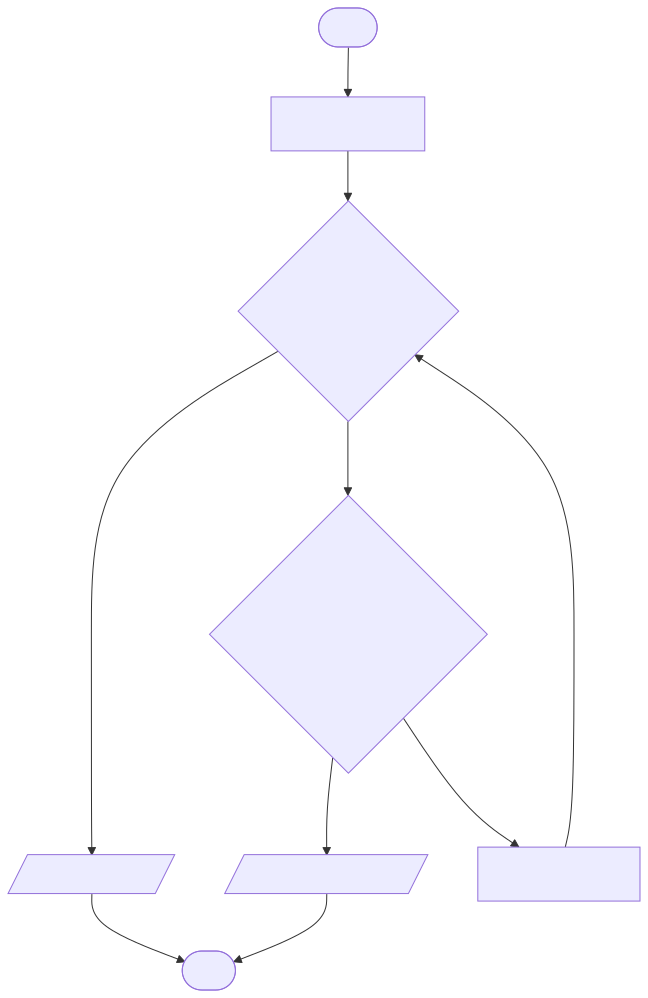

In [ ]:
# @title
mm("""
flowchart TD
    A([Start]) --> B[Set index = 0]
    B --> C{Is index < array length?}
    C -->|No| D[/Print 'Not found'/]
    D --> E([End])
    C -->|Yes| F{Does array at index == target?}
    F -->|Yes| G[/Print 'Found at' index/]
    G --> E
    F -->|No| H[Add 1 to index]
    H --> C""")

**Linear Search Flowchart** shows the complete algorithm. Notice:
- Two decision diamonds: one for "keep searching?" and one for "found it?"
- Two ways to reach the End: finding the target OR exhausting the array
- The back-arrow creates the loop

### Introducing `break`

When we find what we're looking for, we want to stop immediately—no need to keep searching! Java's `break` statement does exactly this: it exits the current loop immediately.

Think of it like Tom Haverford at a meeting: the moment he gets what he wants, he's out the door. No waiting around.

```java
int[] numbers = {10, 25, 3, 47, 8};
int target = 47;

for (int i = 0; i < numbers.length; i++) {
    if (numbers[i] == target) {
        System.out.println("Found at index " + i);
        break;  // Exit the loop immediately!
    }
}
```

Without `break`, the loop would continue checking the remaining elements even after finding the target—wasteful and potentially confusing if we're tracking the found index.

In [ ]:
%%writefile ParksSearch.java
public class ParksSearch {
    public static void main(String[] args) {
        String[] parks = {"Ramsett Park", "Pawnee Commons", "Lot 48",
                          "Pawnee National Park", "Circle Park"};
        String target = "Lot 48";

        boolean found = false;
        int foundIndex = -1;

        for (int i = 0; i < parks.length; i++) {
            System.out.println("Checking index " + i + ": " + parks[i]);
            if (parks[i].equals(target)) {
                found = true;
                foundIndex = i;
                break;  // Stop searching!
            }
        }

        if (found) {
            System.out.println("SUCCESS: '" + target + "' found at index " + foundIndex);
        } else {
            System.out.println("NOT FOUND: '" + target + "' is not in the list");
        }
    }
}

Writing ParksSearch.java


In [ ]:
!javac ParksSearch.java
!java ParksSearch

Checking index 0: Ramsett Park
Checking index 1: Pawnee Commons
Checking index 2: Lot 48
SUCCESS: 'Lot 48' found at index 2


**ParksSearch.java** demonstrates linear search with:
- A `boolean found` flag to track whether we found the target
- An `int foundIndex` to remember where we found it
- `break` to exit early once found
- Print statements showing each step (helpful for understanding, but you'd remove these in production code)

Try changing `target` to `"Circle Park"` (found late) or `"Eagleton Park"` (not found) to see different behaviors!

### Handling "Not Found"

There are two common patterns for detecting when a target isn't in the array:

**Pattern 1: Boolean Flag** (used in our example above)
```java
boolean found = false;
for (int i = 0; i < arr.length; i++) {
    if (arr[i] == target) {
        found = true;
        break;
    }
}
// After loop: check 'found' variable
```

**Pattern 2: Sentinel Index**
```java
int foundIndex = -1;  // -1 means "not found"
for (int i = 0; i < arr.length; i++) {
    if (arr[i] == target) {
        foundIndex = i;
        break;
    }
}
// After loop: if foundIndex is still -1, not found
```

Both work well. The sentinel index pattern is slightly more compact since `-1` does double duty as both "not found" indicator and a non-valid array index.

### 🏋️ Exercise 2: Modify the Search

The Parks Department wants to know how many employees have the first name "Jerry" (spoiler: he goes by many names). Instead of stopping at the first match, count ALL occurrences.

**Complete the TODOs:**

**Expected output:** The name "Jerry" appears 3 times.

In [ ]:
%%writefile Exercise2.java

public class Exercise2 {
  public static void main (String[] args){
    String[] employees = {"Leslie", "Jerry", "Ron", "Jerry", "April",
                      "Andy", "Jerry", "Tom", "Donna"};
    String searchName = "Jerry";

    // TODO 1: Declare a counter variable, initialized to 0

    for (int i = 0; i < employees.length; i++) {
        if (employees[i].equals(searchName)) {
            // TODO 2: Increment the counter

            // TODO 3: Should we use 'break' here? Why or why not?

        }
    }

    // TODO 4: Print the total count

  }
}

Overwriting Exercise2.java


In [ ]:
!javac Exercise2.java
!java Exercise2

### Linear Search: Pros and Cons

**Advantages:**
- Simple to understand and implement
- Works on any array (sorted or unsorted)
- No setup or preprocessing required

**Disadvantages:**
- Slow for large datasets (might check every element)
- Doesn't get faster if data is sorted

For the Parks Department's list of 5 parks, linear search is perfectly fine. But what if Pawnee had 5 million citizen records? We'd want a faster algorithm (like binary search—but that's for another day!).

We'll explore how to measure this "slowness" more precisely later.

##  Accumulator Patterns

An **accumulator** is a variable that "accumulates" (gathers) a result as you iterate through data. It's like Ben Wyatt going through the Parks Department budget line by line, keeping a running total.

The pattern is simple:
1. **Initialize** the accumulator before the loop
2. **Update** it inside the loop
3. **Use** the final value after the loop

Here are the most common accumulator patterns:

| Pattern | Initialize To | Update Operation | Use Case |
|---------|---------------|------------------|----------|
| **Sum** | `0` | `total += value` | Total budget, combined scores |
| **Count** | `0` | `count++` | Number of complaints, attendees |
| **Product** | `1` | `product *= value` | Compound interest, factorials |
| **Min** | First element or `Integer.MAX_VALUE` | `if (val < min) min = val` | Lowest bid, coldest day |
| **Max** | First element or `Integer.MIN_VALUE` | `if (val > max) max = val` | Highest score, peak attendance |
| **String Building** | `""` | `result += str` | Building a report, combining names |

Let's explore each one!

### Sum Accumulator

Calculate the total cost of supplies for the Harvest Festival:

```java
double[] prices = {29.99, 15.50, 8.75, 42.00, 12.25};
double total = 0;  // Initialize to 0

for (int i = 0; i < prices.length; i++) {
    total += prices[i];  // Add each price
}

System.out.println("Total: $" + total);  // Total: $108.49
```

Key insight: `total` starts at 0 because adding 0 to anything doesn't change it (0 is the "identity" for addition).

### Count Accumulator

Count how many citizen complaints mention the word "raccoon":

```java
String[] complaints = {"raccoon in yard", "pothole on Main",
                       "raccoon stole lunch", "park bench broken",
                       "raccoon army forming"};
int raccoonCount = 0;  // Initialize to 0

for (int i = 0; i < complaints.length; i++) {
    if (complaints[i].contains("raccoon")) {
        raccoonCount++;  // Increment when condition is true
    }
}

System.out.println("Raccoon complaints: " + raccoonCount);  // 3
```

The count accumulator is just a sum accumulator where we add 1 each time a condition is met.

### Introducing `continue`

Sometimes you want to skip certain iterations without exiting the loop entirely. Java's `continue` statement skips the rest of the current iteration and jumps to the next one.

Think of it like April Ludgate at the front desk: when certain citizens approach, she just... skips them. Doesn't help, doesn't quit her job, just moves on to the next person.

```java
String[] tasks = {"File report", "SKIP", "Call vendor", "SKIP", "Update website"};

for (int i = 0; i < tasks.length; i++) {
    if (tasks[i].equals("SKIP")) {
        continue;  // Skip to next iteration
    }
    System.out.println("Completing: " + tasks[i]);
}
```

Output:
```
Completing: File report
Completing: Call vendor
Completing: Update website
```

The "SKIP" items are ignored, but the loop keeps going (unlike `break`, which would exit entirely).

In [ ]:
%%writefile BudgetAnalyzer.java
public class BudgetAnalyzer {
    public static void main(String[] args) {
        // Parks Department monthly expenses (negative = refund/error)
        double[] expenses = {250.00, 89.50, -15.00, 450.75, 125.00,
                             -8.25, 312.40, 78.90, 520.00, 95.60};

        double total = 0;
        int largeExpenseCount = 0;  // Count items over $100
        int skippedCount = 0;

        for (int i = 0; i < expenses.length; i++) {
            // Skip negative values (refunds/errors)
            if (expenses[i] < 0) {
                skippedCount++;
                continue;  // Skip to next iteration
            }

            total += expenses[i];  // Sum accumulator

            if (expenses[i] > 100) {
                largeExpenseCount++;  // Count accumulator
            }
        }

        System.out.println("=== Budget Analysis ===");
        System.out.println("Total expenses: $" + total);
        System.out.println("Large expenses (>$100): " + largeExpenseCount);
        System.out.println("Skipped entries: " + skippedCount);
    }
}

Writing BudgetAnalyzer.java


In [ ]:
!javac BudgetAnalyzer.java
!java BudgetAnalyzer

=== Budget Analysis ===
Total expenses: $1922.15
Large expenses (>$100): 5
Skipped entries: 2


**BudgetAnalyzer.java** combines multiple patterns:
- `continue` to skip invalid (negative) entries
- Sum accumulator for the total
- Count accumulator for large expenses
- Another count accumulator for skipped items

Notice how `continue` lets us handle the "skip" case cleanly without deeply nested if-else blocks.

### Min/Max Accumulators

Finding the highest or lowest value requires a slightly different approach:

```java
int[] attendance = {150, 89, 234, 178, 95, 312, 201};

int maxAttendance = attendance[0];  // Start with first element
int minAttendance = attendance[0];

for (int i = 1; i < attendance.length; i++) {  // Start at 1!
    if (attendance[i] > maxAttendance) {
        maxAttendance = attendance[i];
    }
    if (attendance[i] < minAttendance) {
        minAttendance = attendance[i];
    }
}

System.out.println("Peak attendance: " + maxAttendance);  // 312
System.out.println("Lowest attendance: " + minAttendance);  // 89
```

**Why start with the first element?** If we initialized `max` to 0, and all values were negative, we'd get the wrong answer. Using the first element guarantees our starting point is a valid value from the data.

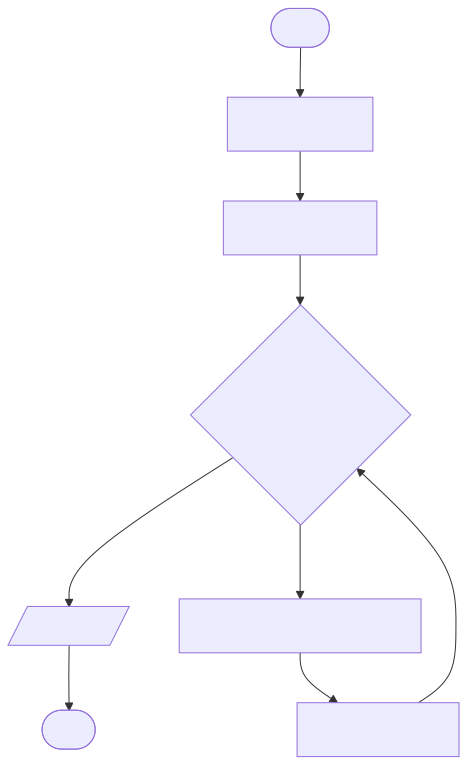

In [ ]:
# @title
mm("""
flowchart TD
    A([Start]) --> B[Set total = 0]
    B --> C[Set index = 0]
    C --> D{Is index < array length?}
    D -->|No| E[/Print total/]
    E --> F([End])
    D -->|Yes| G[Add array at index to total]
    G --> H[Add 1 to index]
    H --> D""")

**Generic Sum Accumulator Flowchart** shows the pattern visually. For other accumulators (count, min, max), the structure is the same—only the initialization and update steps change.

### 🏋️ Exercise 3: Build an Accumulator

The Parks Department collected citizen satisfaction ratings (scale of 1-10) at various events. Calculate the **average** rating.

**Complete the TODOs:**

**Hint for TODO 3:** If both numbers are integers, Java does integer division (truncates decimals). To get a decimal result, make sure at least one number is a `double`. You can do this by: `(double) sum / ratings.length`


In [ ]:
%%writefile Exercise3.java

public class Exercise3{
  public static void main (String[] args){
    int[] ratings = {8, 9, 7, 10, 6, 9, 8, 10, 7, 8};

    // TODO 1: Declare a sum accumulator (what type? what initial value?)

    // TODO 2: Loop through the array and add each rating to your sum

    // TODO 3: Calculate the average (sum divided by number of ratings)
    //         Hint: Be careful about integer division!

    // TODO 4: Print the average (should be 8.2)

  }
}

Overwriting Exercise3.java


In [ ]:
!javac Exercise3.java
!java Exercise3

## The `switch` Statement

Imagine routing visitors to different floors based on their department code:

```java
String dept = "PARKS";

if (dept.equals("PARKS")) {
    System.out.println("Floor 3");
} else if (dept.equals("PLANNING")) {
    System.out.println("Floor 2");
} else if (dept.equals("HEALTH")) {
    System.out.println("Floor 4");
} else if (dept.equals("SANITATION")) {
    System.out.println("Floor 1");
} else if (dept.equals("PERMITS")) {
    System.out.println("Floor 2");
} else {
    System.out.println("Check directory");
}
```

This works, but it's repetitive and hard to read. When you're checking one variable against multiple possible values, Java offers a cleaner alternative: the `switch` statement.

### Introducing `switch`

The `switch` statement evaluates an expression once and compares it against multiple `case` labels:

```java
String dept = "PARKS";

switch (dept) {
    case "PARKS":
        System.out.println("Floor 3");
        break;
    case "PLANNING":
        System.out.println("Floor 2");
        break;
    case "HEALTH":
        System.out.println("Floor 4");
        break;
    default:
        System.out.println("Check directory");
}
```

**Key components:**
- `switch (expression)` — The value to check (works with `int`, `char`, `String`, and some other types)
- `case value:` — A possible match; code runs if expression equals this value
- `break;` — Exit the switch (IMPORTANT! Without it, execution "falls through" to the next case)
- `default:` — Runs if no case matches (like `else`); optional but recommended

**Warning about fall-through:** If you forget `break`, Java will execute the next case too! This is occasionally useful but usually a bug.

In [ ]:
%%writefile DepartmentRouter.java
public class DepartmentRouter {
    public static void main(String[] args) {
        String deptCode = "PARKS";

        System.out.println("Welcome to Pawnee City Hall!");
        System.out.println("Looking up department: " + deptCode);
        System.out.println();

        switch (deptCode) {
            case "PARKS":
                System.out.println("Department: Parks and Recreation");
                System.out.println("Floor: 3");
                System.out.println("Director: Leslie Knope (acting)");
                break;
            case "PLANNING":
                System.out.println("Department: City Planning");
                System.out.println("Floor: 2");
                System.out.println("Note: Currently reviewing zoning requests");
                break;
            case "HEALTH":
                System.out.println("Department: Health Department");
                System.out.println("Floor: 4");
                System.out.println("Note: Free flu shots available!");
                break;
            case "PERMITS":
            case "LICENSES":
                // Multiple cases can share the same code!
                System.out.println("Department: Permits & Licenses");
                System.out.println("Floor: 1");
                System.out.println("Note: Take a number at the kiosk");
                break;
            default:
                System.out.println("Unknown department code: " + deptCode);
                System.out.println("Please check the lobby directory.");
        }
    }
}

Writing DepartmentRouter.java


In [ ]:
!javac DepartmentRouter.java
!java DepartmentRouter

Welcome to Pawnee City Hall!
Looking up department: PARKS

Department: Parks and Recreation
Floor: 3
Director: Leslie Knope (acting)


**DepartmentRouter.java** shows a practical switch statement:
- Each case has multiple statements before `break`
- `PERMITS` and `LICENSES` share the same code (intentional fall-through)
- `default` handles unexpected input gracefully

Try changing `deptCode` to `"HEALTH"`, `"PERMITS"`, or `"UNKNOWN"` to see different outputs!

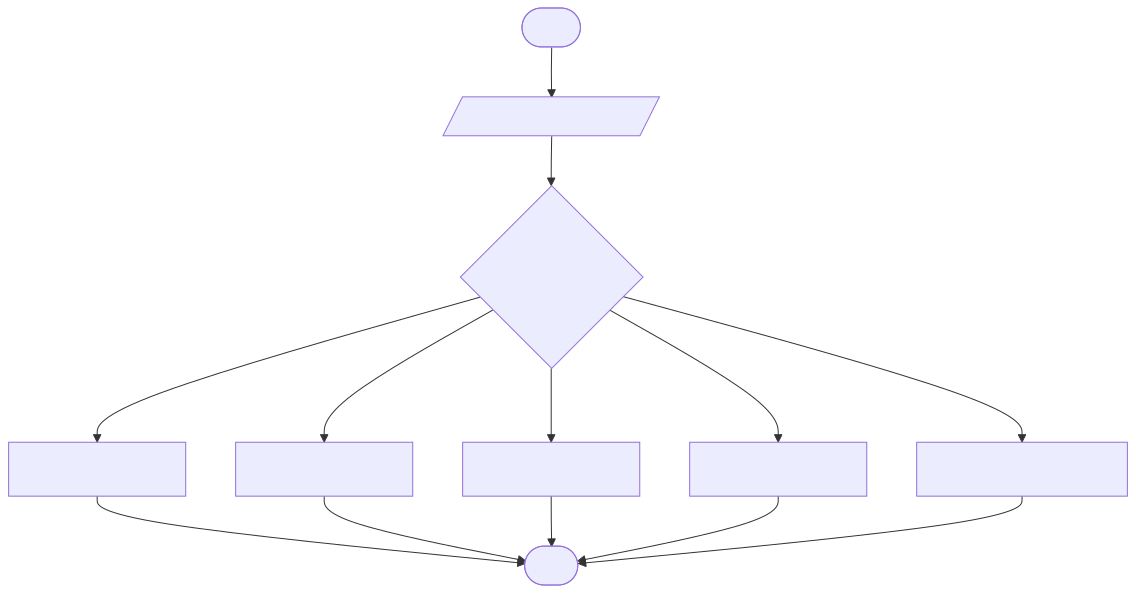

In [ ]:
# @title
mm("""
flowchart TD
    A([Start]) --> B[/Read department code/]
    B --> C{department code?}
    C -->|PARKS| D[Print Floor 3 info]
    C -->|PLANNING| E[Print Floor 2 info]
    C -->|HEALTH| F[Print Floor 4 info]
    C -->|PERMITS or LICENSES| G[Print Floor 1 info]
    C -->|other| H[Print 'check directory']
    D --> I([End])
    E --> I
    F --> I
    G --> I
    H --> I
    """)


**Switch Flowchart Representation** shows how a switch creates multiple branches from a single decision point. Unlike nested if-else diamonds, a switch is conceptually one multi-way branch.

Notice how all paths converge at the End—each case is mutually exclusive (assuming proper `break` statements).

### 🏋️ Exercise 4: Complete the Switch

The Parks Department uses a 1-5 star rating system for events. Complete the switch statement to print a description for each rating.

**Complete the TODOs:**

**Test your solution** with `stars` set to 5, 4, 3, 2, 1, and 0.


In [ ]:
%%writefile Exercise4.java

public class Exercise4{
  public static void main (String[] args){
    int stars = 4;

    switch (stars) {
      case 5:
          System.out.println("OUTSTANDING - A Leslie Knope masterpiece!");
          break;
      case 4:
          // TODO 1: Print a positive message for 4 stars
          // TODO 2: Don't forget something important after the print!
      case 3:
          System.out.println("SATISFACTORY - Met expectations");
          break;
      // TODO 3: Add a case for 2 stars with an appropriate message

      // TODO 4: Add a case for 1 star with an appropriate message

      default:
          // TODO 5: What should happen for invalid ratings (0, 6, -1, etc.)?
    }

  }
}

Writing Exercise4.java


In [ ]:
!javac Exercise4.java
!java Exercise4

SATISFACTORY - Met expectations


## Introduction to Algorithm Analysis

Imagine Leslie Knope searching for a specific binder. If she has 10 binders, checking each one is quick. But what if she has 10,000 binders? Or 10 million records in a citizen database?

**Algorithm analysis** helps us answer: *How does an algorithm's performance scale as the input size grows?*

This matters because:
- A slow algorithm on small data might be unusable on large data
- Choosing the right algorithm can make the difference between seconds and hours
- Understanding efficiency helps you write better code

We won't dive deep into the math (that's for later courses), but let's build intuition about how to think about algorithm performance.

### Counting Operations

One way to analyze an algorithm is to count how many "operations" it performs. Let's analyze linear search:

```java
// Searching for 'target' in an array of n elements
for (int i = 0; i < n; i++) {          // Loop runs up to n times
    if (array[i] == target) {          // 1 comparison per iteration
        return i;                       // Exit if found
    }
}
return -1;                              // Not found
```

How many comparisons does this make?
- **If target is at index 0:** 1 comparison
- **If target is at index 5:** 6 comparisons
- **If target is at last position:** n comparisons
- **If target isn't in array:** n comparisons

The number of operations depends on where (or whether) we find the target. This leads us to think about different "cases."

**Key variable: n** — We use `n` to represent the input size (array length). This lets us express performance in terms of how much data we have.

### Best, Worst, and Average Cases

Since performance varies based on the input, we analyze three scenarios:

| Case | Definition | Linear Search Example | Comparisons |
|------|------------|----------------------|-------------|
| **Best Case** | Most favorable input | Target is the first element | 1 |
| **Worst Case** | Least favorable input | Target is last, or not present | n |
| **Average Case** | Typical/expected input | Target is somewhere in the middle | ~n/2 |

**Parks Department analogy:**
- **Best case:** The form you need is in the first drawer you check (lucky!)
- **Worst case:** The form is in the last drawer, or not in the office at all (Jerry probably misfiled it)
- **Average case:** On average, you'll check about half the drawers before finding it

**Why focus on worst case?** In computer science, we often care most about the worst case because:
- It gives us a guarantee ("it will never be worse than this")
- It protects against bad inputs or adversarial situations
- It's usually easier to analyze than average case

In [ ]:
%%writefile OperationCounter.java
public class OperationCounter {
    public static void main(String[] args) {
        String[] citizens = {"Leslie", "Ron", "Tom", "April", "Andy",
                             "Donna", "Jerry", "Ben", "Chris", "Ann"};

        // Test different scenarios
        searchAndCount(citizens, "Leslie");  // Best case: first element
        searchAndCount(citizens, "Donna");   // Middle case
        searchAndCount(citizens, "Ann");     // Worst case: last element
        searchAndCount(citizens, "Craig");   // Worst case: not found
    }

    public static void searchAndCount(String[] arr, String target) {
        int comparisons = 0;
        int foundIndex = -1;

        for (int i = 0; i < arr.length; i++) {
            comparisons++;  // Count each comparison
            if (arr[i].equals(target)) {
                foundIndex = i;
                break;
            }
        }

        System.out.println("Searching for '" + target + "':");
        if (foundIndex >= 0) {
            System.out.println("  Found at index " + foundIndex);
        } else {
            System.out.println("  Not found");
        }
        System.out.println("  Comparisons made: " + comparisons);
        System.out.println("  Array size (n): " + arr.length);
        System.out.println();
    }
}

In [ ]:
!javac OperationCounter.java
!java OperationCounter

**OperationCounter.java** demonstrates the different cases in action:
- Searching for "Leslie" (index 0): 1 comparison — **best case**
- Searching for "Donna" (index 5): 6 comparisons — **middle case**
- Searching for "Ann" (index 9): 10 comparisons — **worst case (found)**
- Searching for "Craig" (not present): 10 comparisons — **worst case (not found)**

Notice that both worst cases (last element and not found) require checking ALL n elements. This is why we say linear search has "worst case n comparisons" or, more formally, is **O(n)** ("order n" or "linear time").


## A Faster Way — Introduction to Binary Search

Linear search works, but remember: in the worst case, we check every single element. If Leslie's binder collection grows to 10,000 binders, that's potentially 10,000 checks to find one document.

But what if the binders were *alphabetically organized*? Leslie Knope would never settle for chaos—her binders are meticulously sorted. Can we use that to our advantage?

**Spoiler:** Yes. Dramatically.

### The Phone Book Insight

Think about how you'd search a phone book (ask your parents—it's a big paper book of names and numbers that used to exist).

Would you start at page 1 and check every name? Of course not! You'd:

1. Open to the **middle** of the book
2. Check if the name you want comes **before** or **after** that page
3. Eliminate **half** the book instantly
4. Repeat with the remaining half

This is **binary search**—and it's *much* faster than linear search. The catch? The data must be **sorted** first.


### Binary Search Algorithm

Here's how binary search works on a sorted array:

1. Set `low` to the first index (0) and `high` to the last index (length - 1)
2. Find the `middle` index: `(low + high) / 2`
3. Compare the middle element to the target:
   - If they match → Found it! Done.
   - If target < middle element → Search the left half (set `high = middle - 1`)
   - If target > middle element → Search the right half (set `low = middle + 1`)
4. Repeat until found OR `low > high` (not found)

Each comparison eliminates **half** the remaining elements. That's powerful.


### Binary Search Flowchart

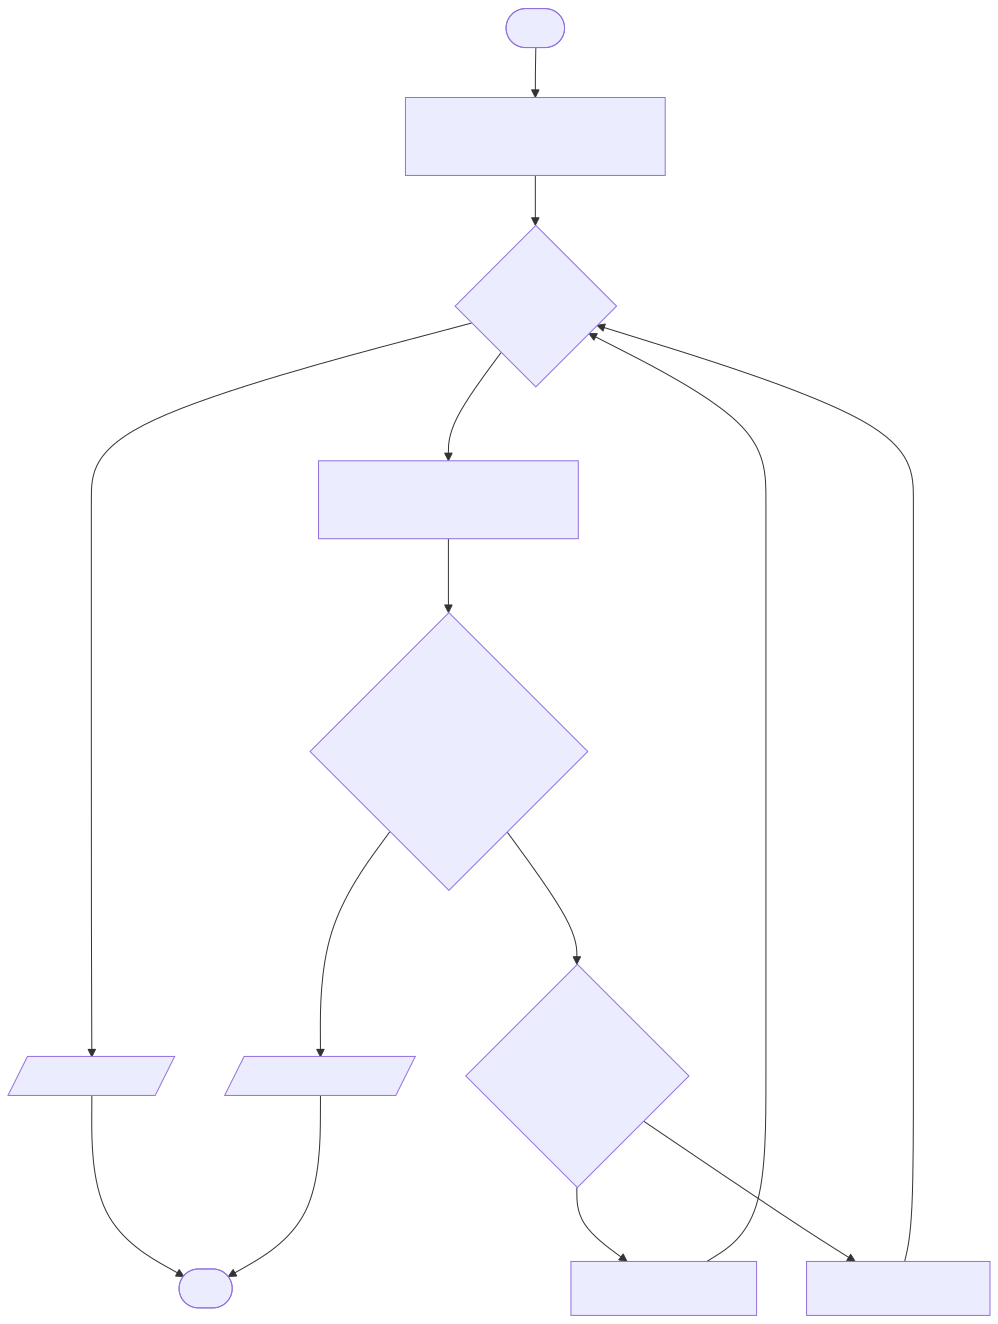

In [ ]:
# @title
mm("""
flowchart TD
    A([Start]) --> B[Set low = 0, high = length - 1]
    B --> C{Is low <= high?}
    C -->|No| D[/Print 'Not found'/]
    D --> E([End])
    C -->|Yes| F[Calculate mid = low + high / 2]
    F --> G{Does array at mid == target?}
    G -->|Yes| H[/Print 'Found at' mid/]
    H --> E
    G -->|No| I{Is target < array at mid?}
    I -->|Yes| J[Set high = mid - 1]
    I -->|No| K[Set low = mid + 1]
    J --> C
    K --> C""")

Notice how each "No" branch adjusts either `low` or `high`, cutting the search space in half.


### Binary Search in Action

Let's trace through an example. Searching for **"Lot 48"** in a sorted array of parks:

```
Index:    0              1              2                3                  4
Array:  ["Circle Park", "Lot 48", "Pawnee Commons", "Pawnee National", "Ramsett Park"]
Target: "Lot 48"
```

**Iteration 1:**
- `low = 0`, `high = 4`, `mid = 2`
- `array[2]` = "Pawnee Commons"
- "Lot 48" < "Pawnee Commons" (alphabetically) → search left half
- Set `high = 1`

**Iteration 2:**
- `low = 0`, `high = 1`, `mid = 0`
- `array[0]` = "Circle Park"
- "Lot 48" > "Circle Park" → search right half
- Set `low = 1`

**Iteration 3:**
- `low = 1`, `high = 1`, `mid = 1`
- `array[1]` = "Lot 48"
- **Found it!**

Only **3 comparisons** for 5 elements. Linear search could have taken up to 5.

### Full Program: Binary Search



In [ ]:
%%writefile BinarySearch.java
public class BinarySearch {
    public static void main(String[] args) {
        // IMPORTANT: Array must be sorted!
        String[] parks = {"Circle Park", "Lot 48", "Pawnee Commons",
                          "Pawnee National Park", "Ramsett Park"};
        String target = "Lot 48";

        int low = 0;
        int high = parks.length - 1;
        int comparisons = 0;
        int foundIndex = -1;

        while (low <= high) {
            int mid = (low + high) / 2;
            comparisons++;

            System.out.println("Checking index " + mid + ": " + parks[mid]);

            int comparison = target.compareTo(parks[mid]);

            if (comparison == 0) {
                foundIndex = mid;
                break;  // Found it!
            } else if (comparison < 0) {
                high = mid - 1;  // Search left half
            } else {
                low = mid + 1;   // Search right half
            }
        }

        System.out.println();
        if (foundIndex >= 0) {
            System.out.println("SUCCESS: '" + target + "' found at index " + foundIndex);
        } else {
            System.out.println("NOT FOUND: '" + target + "' is not in the list");
        }
        System.out.println("Total comparisons: " + comparisons);
        System.out.println("Array size: " + parks.length);
    }
}


In [ ]:
!javac BinarySearch.java
!java BinarySearch

**Note:** We use `compareTo()` for String comparison. It returns:
- **0** if strings are equal
- **negative** if the first string comes before the second alphabetically
- **positive** if the first string comes after


### The Power of Halving: Why Binary Search is Fast

Here's the magic: each comparison cuts the search space in half.

| Array Size (n) | Linear Search (worst) | Binary Search (worst) |
|----------------|----------------------|----------------------|
| 10 | 10 comparisons | 4 comparisons |
| 100 | 100 comparisons | 7 comparisons |
| 1,000 | 1,000 comparisons | 10 comparisons |
| 1,000,000 | 1,000,000 comparisons | 20 comparisons |
| 1,000,000,000 | 1,000,000,000 comparisons | 30 comparisons |

Binary search's worst case is **log₂(n)** comparisons—that's the number of times you can halve n before reaching 1.

Think about it: to search **one billion** records:
- Linear search: up to 1,000,000,000 checks
- Binary search: about 30 checks

That's the difference between waiting hours and waiting milliseconds.

---

### Linear vs. Binary: When to Use Each

| | Linear Search | Binary Search |
|---|--------------|---------------|
| **Requires sorted data?** | No | Yes |
| **Worst case comparisons** | n | log₂(n) |
| **Best for** | Small arrays, unsorted data | Large sorted arrays |
| **Simplicity** | Very simple | More complex |
| **Setup cost** | None | Must sort first |

**Ron Swanson's wisdom:** "Use the right tool for the job. Binary search is like my bandsaw—powerful, but you need everything lined up first. Linear search is like a handsaw—simple, works anywhere, but slower for big jobs."


## 🏋️ Exercise 5: Implement Binary Search
The Parks Department maintains a sorted list of budget codes. Each department has a unique numeric code, and they need to quickly look up whether a given code is valid.

Complete the TODOs to implement binary search:

In [ ]:
%%writefile Exercise5.java

public class Exercise5{
  public static void main (String[] args){
    int[] budgetCodes = {101, 118, 203, 247, 302, 355, 410, 482, 519, 567,
                     623, 688, 701, 755, 812, 849, 903, 958};
    int targetCode = 355;  // Parks Department budget code

    int low = 0;
    int high = budgetCodes.length - 1;
    boolean found = false;

    while (low <= high) {
        // TODO 1: Calculate the middle index
        int mid = ______________________;

        System.out.println("Checking index " + mid + ": " + budgetCodes[mid]);

        if (budgetCodes[mid] == targetCode) {
            // TODO 2: What two things should happen when we find the target?


        } else if (targetCode < budgetCodes[mid]) {
            // TODO 3: Target is smaller than middle element.
            //         Which half should we search? Update the correct variable.

        } else {
            // TODO 4: Target is larger than middle element.
            //         Which half should we search? Update the correct variable.

        }
    }

    if (found) {
        System.out.println("Budget code " + targetCode + " is VALID");
    } else {
        System.out.println("Budget code " + targetCode + " is INVALID");
    }

  }
}



In [ ]:
!javac Exercise5.java
!java Exercise5

## Summary and Conclusion

Congratulations! You've leveled up your programming toolkit significantly. Let's recap what we covered:

### Key Takeaways

1. **Algorithms** are precise, finite sequences of steps that solve problems—and you've been writing them all along with loops and conditionals.

2. **Flowcharts** visualize algorithm logic using standardized symbols. Mermaid lets us create them with simple text-based syntax.

3. **Linear search** finds items by checking each element one by one. Simple but slow for large datasets. **Binary search** is much faster, but requires that date be sorted.

4. **Accumulator patterns** (sum, count, min, max) are fundamental techniques for processing collections of data.

5. **`break`** exits a loop immediately; **`continue`** skips to the next iteration; **`switch`** provides clean multi-way branching.

6. **Algorithm analysis** helps us understand how performance scales. Linear search is O(n)—in the worst case, it checks every element.



## Review Game: Loop of the Recursive Dragon
https://brendanpshea.github.io/LotRD/?set=java_03_algorithms.json


## Glossary

| Term | Definition |
|------|------------|
| **Algorithm** | A precise, finite sequence of well-defined steps that solves a problem or accomplishes a task |
| **Flowchart** | A visual diagram representing an algorithm using standardized symbols (ovals, rectangles, diamonds, parallelograms) connected by arrows |
| **Mermaid** | A text-based diagramming tool that converts simple code into visual diagrams like flowcharts |
| **Terminal (flowchart)** | Oval-shaped symbol representing the start or end of an algorithm |
| **Process (flowchart)** | Rectangle-shaped symbol representing an action or operation |
| **Decision (flowchart)** | Diamond-shaped symbol representing a yes/no or true/false branch point |
| **Input/Output (flowchart)** | Parallelogram-shaped symbol representing reading input or displaying output |
| **Linear Search** | An algorithm that finds a target value by checking each element sequentially from beginning to end |
| **Binary Search** | An algorithm that finds a target in a sorted array by repeatedly dividing the search space in half |
| **Accumulator** | A variable that gathers or builds up a result across multiple loop iterations |
| **Sum Accumulator** | An accumulator pattern that adds values together, initialized to 0 |
| **Count Accumulator** | An accumulator pattern that counts occurrences, initialized to 0 |
| **Min/Max Accumulator** | An accumulator pattern that tracks the smallest or largest value seen, typically initialized to the first element |
| **Sentinel Value** | A special value (like -1) used to indicate a condition such as "not found" |
| **Boolean Flag** | A boolean variable used to track whether a condition has been met (e.g., `found = true`) |
| **`break`** | Java keyword that immediately exits the current loop or switch statement |
| **`continue`** | Java keyword that skips the rest of the current loop iteration and proceeds to the next iteration |
| **`switch`** | Java statement that selects one of many code blocks to execute based on the value of an expression |
| **`case`** | Java keyword used within a switch statement to define a possible matching value |
| **`default`** | Java keyword used within a switch statement to define code that runs when no case matches |
| **Fall-through** | Behavior in switch statements where execution continues into the next case if `break` is omitted |
| **`compareTo()`** | String method that compares two strings lexicographically; returns 0 if equal, negative if first comes before second, positive if first comes after |
| **Best Case** | The most favorable input scenario for an algorithm, resulting in minimum operations |
| **Worst Case** | The least favorable input scenario for an algorithm, resulting in maximum operations |
| **Average Case** | The expected performance of an algorithm across typical or random inputs |
| **n** | Variable conventionally used to represent the input size in algorithm analysis |
| **O(n)** | "Order n" or "linear time"; describes algorithms where operations grow proportionally with input size |
| **O(log n)** | "Order log n" or "logarithmic time"; describes algorithms where operations grow with the logarithm of input size |
| **log₂(n)** | The number of times n can be divided by 2 before reaching 1; the basis for binary search efficiency |